In [179]:
import numpy as np
from scipy import signal
from scipy import linalg
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d as mpl3d

In [180]:
mpl.use("pgf")
mpl.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

zoom = 0.60
line = 0.75
np.random.seed(3)

/home/fabian/.local/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.


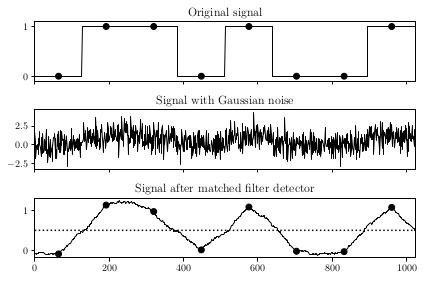

In [181]:
sig = np.repeat([0., 1., 1., 0., 1., 0., 0., 1.], 128)
sig_noise = sig + np.random.randn(len(sig))

corr = signal.correlate(sig_noise, np.ones(128), mode='same') / 128

clock = np.arange(64, len(sig), 128)

fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, sharex=True)

ax_orig.plot(sig, 'k-', linewidth=line, antialiased=True)
ax_orig.plot(clock, sig[clock], 'ko')
ax_orig.set_title('Original signal')

ax_noise.plot(sig_noise, 'k-', linewidth=line, antialiased=True)
ax_noise.set_title('Signal with Gaussian noise')

ax_corr.plot(corr, 'k-', linewidth=line, antialiased=True)
ax_corr.plot(clock, corr[clock], 'ko')
ax_corr.axhline(0.5, ls=':', color='black')
ax_corr.set_title('Signal after matched filter detector')

ax_orig.margins(0, 0.1)

fig.tight_layout()
fig.show()

/home/fabian/.local/lib/python3.6/site-packages/ipykernel_launcher.py:42: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.


Var Noise: 0.9076659160666298
Var Signal: 0.24609375
SNR: 0.27112811624176353
SNR(dB): -5.668254433361657


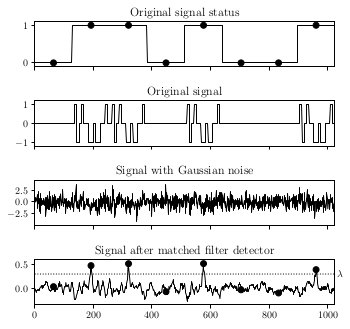

In [182]:
segments = 8
block_len = 128
x = np.linspace(0, block_len, block_len)
block = np.repeat([0., 1., -1., 0., 1., 0., 0., -1., -1., 0., -1., -1., 0., 0., 1., 0.], block_len/16)

x = np.linspace(0, block_len*segments, block_len*segments)
active = np.repeat([0., 1., 1., 0., 1., 0., 0., 1.], block_len)
sig = active * np.tile(block, segments)

status = active #*  np.tile(np.repeat([0., 0., 0., 1., 1., 0., 0., 0.], block_len/8), segments)

sig_noise = sig + np.random.randn(len(sig))
corr = signal.correlate(sig_noise, block, mode='same') / block_len

clock = np.arange(64, len(status), 128)

fig, (ax_seq, ax_orig, ax_noise, ax_corr) = plt.subplots(4, 1, sharex=True)

ax_seq.plot(status, 'k-', linewidth=line, antialiased=True)
ax_seq.plot(clock, status[clock], 'ko', antialiased=True)
ax_seq.set_title('Original signal status')
ax_seq.margins(0, 0.1)

ax_orig.plot(sig, 'k-', linewidth=line, antialiased=True)
ax_orig.set_title('Original signal')
ax_orig.margins(0, 0.1)

ax_noise.plot(sig_noise, 'k-', linewidth=line, antialiased=True)
ax_noise.set_title('Signal with Gaussian noise')
ax_noise.margins(0, 0.1)

ax_corr.plot(corr, 'k-', linewidth=line, antialiased=True)
ax_corr.plot(clock, corr[clock], 'ko', antialiased=True)
ax_corr.axhline(0.3, ls=':', color='black', linewidth=1)
ax_corr.set_title('Signal after matched filter detector')
ax_corr.margins(0, 0.1)
ax2 = ax_corr.twinx()
ax2.axes.get_yaxis().set_ticks([])
ax2.text(1030, 0.625, r'$\lambda$')

fig.tight_layout()
fig.show()

fig = mpl.pyplot.gcf()
w, h = fig.get_size_inches()
fig.set_size_inches(w*0.8, h*0.8*1.5)

plt.savefig('out/mf_all.pgf')

varn = np.var(np.random.randn(len(sig)))
vars = np.var(sig)
print(f"Var Noise: {varn}")
print(f"Var Signal: {vars}")

snr = vars/varn
print(f"SNR: {snr}")
snr_db = 10*np.log10(snr)
print(f"SNR(dB): {snr_db}")

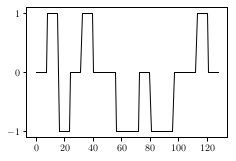

In [183]:
x = np.linspace(0, block_len, block_len)
# plt.xlim(-3.9, 3.9)
# plt.ylim(-0.05, 0.45)
plt.plot(x, block, 'k-', linewidth=line, antialiased=True)
# plt.xlabel(r'$x$')
# plt.ylabel(r'$p(x)$')
plt.locator_params(axis='y', nbins=2)
plt.locator_params(axis='x', nbins=10)
fig = mpl.pyplot.gcf()
w, h = fig.get_size_inches()
fig.set_size_inches(w*zoom, h*zoom)

plt.savefig('out/mf_block.pgf')